# Multiple Linear Regression
Module 1 | Chapter 1 | Notebook 6

***
In this notebook we'll expand the simple linear regression model to use more than one feature to make predictions. Thanks to the metrics and visualizations for model quality that you got to know, you can assess whether the model with several features is better than the models with only one feature each. By the end of this lesson you will be able to:
* Use multiple linear regression
* Examine the assumptions of a multiple linear regression
***


## Multiple linear regression


**Scenario:** A Taiwanese investor comes to you to find out how much his properties in Taiwan are actually worth. He might want to resell them. The data on the houses is located in *Taiwan_real_estate_prediction_data.xlsx*. 

He looked at your prediction based on the proximity to nearest metro station and based on the age of the house and based on food stores in the area. The investor is asking you to look at how much his houses are worth, if you use multiple features at the same time rather than just using one at a time. The training data is in *Taiwan_real_estate_training_data.xlsx*.


In order to get started quickly, let's import the data and process it like we did in the last lesson.


In [1]:
import pandas as pd
df = pd.read_excel('Taiwan_real_estate_training_data.xlsx', index_col='No')
col_names = ['house_age', 
              'metro_distance', 
              'number_convenience_stores', 
              'number_parking_spaces',
              'air_pollution',
              'light_pollution',
              'noise_pollution',
              'neighborhood_quality',
              'crime_score',
              'energy_consumption',
              'longitude', 
              'price_per_ping']
df.columns = col_names
df.loc[:, 'price_per_m2'] = df.loc[:, 'price_per_ping'] / 3.3

The data dictionary for this data is as follows:

Column number | Column name       | Type      | Description
 ------------ | ---     | :---------:           | ------------:
0              | `'house_age'` | continuous (`float`) | age of the house in years
1              | `'metro_distance'` | continuous (`float`) | distance in meters to the next metro station
2              | `'number_convenience_stores'` | continuous (`int`) | Number of convenience stores nearby
3              | `'number_parking_spaces'` | continuous (`int`) | Number of parking spaces nearby
4              | `'air_pollution'` | continuous (`float`) | Air pollution value near the house
5              | `'light_pollution'` | continuous (`float`) | Light pollution value near the house
6              | `'light_pollution'` | continuous (`float`) | Light pollution value near the house
7              | `'neighborhood_quality'` | continuous (`float`) | average Quality of life in the neighborhood
8              | `'crime_score'` | continuous (`float`) | crime score according to police
9              | `'energy_consumption'` | continuous (`float`) | The property's energy consumption
10              | `'longitude'` | continuous (`float`) | The property's longitude
11              | `'price_per_ping'` | continuous (`float`) | House price in Taiwan dollars per ping, one ping is 3.3 square meters
12              | `'price_per_ping'` | continuous (`'float'`) | House price in Taiwan dollars per m²


Since the lesson *Simple linear regression with sklearn* you know that regression models follow this formula:

\begin{equation*}
Target = intercept + (slope \cdot Feature) + error
\end{equation*}

Multiple linear regression uses several features simultaneously to make predictions for the data. Each feature ($Feature_1$ and $Feature_2$) gets its own slope ($slope_1$ and $slope_2$). This also changes the formula, which looks like this for two features:

\begin{equation*}
Target = intercept + (slope_1 \cdot Feature_1) + (slope_2 \cdot Feature_2) + error
\end{equation*}


**Deep dive**: The following content is optional, feel free to skip it.<br>
You can generalize this formula using matrices and vectors:

<table style="float:left;">
    <tr><th align="center">Word formula</th>
        <th align="center">math. Formula</th>
    </tr>
<tr>
<td>
\begin{equation*}
prediction vector = feature matrix \cdot slope vector + intercept + error vector
\end{equation*}
    </td>
<td>
\begin{equation*}
\hat{y} = X\cdot\vec{\beta} + \beta_{0} + \vec{\epsilon}
\end{equation*}    
        </td>
    </tr>
</table>

<br style="clear:both">When predicting with the model, the intercept ($\beta_{0}$) is converted by *broadcasting* into a vector with the same length as the slope vector and then the equation can be solved - we get our predictions $\hat{y}$

In sklearn this *broadcasting* step is omitted, instead the intercept is written in the zero position of the slope vector. Since this is an additional constant, a column is added to the feature matrix at position 0. This column is filled with ones so that the scalar product of the feature matrix and slope vector is always increased by the value of the intercept when calculating the prediction. This conversion is equivalent to our calculation above.


We can also imagine the difference graphically. While in simple linear regression with one feature we fit a line to points in an area, in multiple linear regression with two features we fit a plane to points in space.


So the parameters of a regression with one feature describe a line like this:

![simple linear regression](01_01_05_pic1_en.png)


So the parameters of a regression with two feature describe a plane like this:

![multiple linear regression](01_01_05_pic2_en.png)


If you add even more features, this is what we call a hyperplane, which you can no longer imagine spatially. This hyperplane has as many dimensions as there are features.


**Note:**
The term **linear regression** does not, as people often assume, come from the fact that we draw a line through the data points. As you have seen, a line is only used in the special case of linear regression with just one feature. In all other cases we use a (hyper)plane rather than a line. The name linear regression is derived from the linear combination of the matrices and vectors of the regression model.


Now let's try out a multiple linear regression. We'll follow the same five steps again:
1. Select model type: `Linear Regression`
2. Instantiate the model with certain hyperparameters: Store standard model with axis intercept in `model_multiple`
3. Organize data into a feature matrix and target vector: `features` and `target`
4. Model fitting: use `my_model.fit()`
5. Make predictions with the trained model: use `my_model.predict()`

We'll stick with  `LinearRegression` from the `sklearn.linear_model` module. Import it.


In [2]:
from sklearn.linear_model import LinearRegression

Also the second step is no different to in a simple linear regression. In this case we'll call the model `model_multiple`.


In [3]:
model_multiple = LinearRegression(fit_intercept=True)

A difference only becomes apparent in the third step. The feature matrix now includes more than one feature. We'll use the `'house_age'` and `'metro_distance'` columns.


In [4]:
# step 3
features_multiple = df.loc[:, ['house_age', 'metro_distance']]
target = df.loc[:, 'price_per_m2']

In the fourth step (*model fitting*) two slopes are now calculated: one slope for the `'house_age'` and one slope for the `'metro_distance'` feature. Use the model `model_multiple` together with the feature matrix `features_multiple` and the target vector `target` to fit a multiple linear regression model to the data. Then print the slopes in `model_multiple.coef_` and the intercept in `model_multiple.intercept_`.


In [5]:
model_multiple.fit(features_multiple, target)
print(model_multiple.coef_)
print(model_multiple.intercept_)

[-0.07615426 -0.00218815]
15.277396784757384


The interpretation of the parameters has not changed. The model predicts that with each additional year of age for the property, its value decreases by $0.08 per square meter. With every meter of distance to the nearest metro station, the value of the property decreases by 0.02 dollars.

We can now determine the model quality using the *mean quared error* and *R²* values as before. Does the multiple linear regression model perform better than the simple linear regression models?


In [6]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
target_pred = model_multiple.predict(features_multiple)


print(mean_squared_error(target, target_pred))
print(r2_score(target, target_pred))

9.337033633449392
0.4780649322899778


It's true. If we summarize all the models calculated so far in a table, you'll notice that both the mean squared error and the coefficient of determination are better in the multiple linear regression.

Model| *MSE*| *R²*
---|---|---
`model_age`| 16.97 | 5.1%
`model_metro`| 10.07 | 43.7%
`model_stores`| 12.21 | 31.8%
`model_multiple`| 9.34 | 47.8%


We can now look at the regression plane visually. 3D visualizations are not part of this module. So here's this image for now:

![multiple linear regression](01_01_05_pic3_en.png)


In multiple linear regression, the residuals are the vertical distances between the actual data points and the regression plane. So we can take another look at a residual plot to see whether the assumptions of the regression model are correct. 

Create a residual plot with the predicted real estate prices on the x-axis and the residuals on the y-axis. Don't forget to draw a zero line to make it easier to interpret the graph.


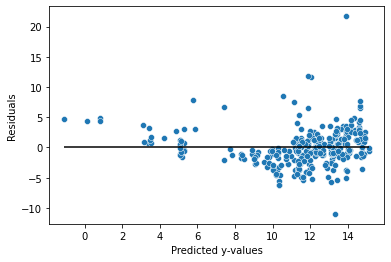

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots( )

target_pred_multiple = model_multiple.predict(features_multiple)
residuals = target - target_pred_multiple

residuals = target - target_pred
sns.scatterplot(x=target_pred_multiple,
                y=residuals,
                ax=axs);

axs.hlines(y=0,
          xmin=target_pred.min(),
          xmax=target_pred.max(),
          color='black')
axs.set(ylabel='Residuals',xlabel='Predicted y-values');

The residual plot should now look something like this:

![residuals graph](01_01_05_pic4_en.png)


Our evaluation of the residual plot is that the data points are concentrated on the right. One assumption of the linear regression model (linear dependency) is not quite fulfilled here.


**Congratulations:** You have created your first multiple linear regression. Now you can use several features at the same time to predict continuous values. However, you should consider a new assumption. We'll look at that next.


## Assumptions of the multiple linear regression


We have already interpreted the calculated increases of the features. The model predicts that with every additional year of age, the property prices lose 0.83 dollars per square meter. With every meter of distance to the nearest metro station, the value of the property decreases by 0.02 dollars. 

It's noticeable that this interpretation assumes an independence of age and metro distance. The age of the property says nothing about its metro distance, and vice versa. So, you don't say things like "Older properties are generally located further away from metro stations and are therefore worth less", but "older properties are simply older and therefore worth less".

Overall, multiple linear regression is therefore made up of the four assumptions of the simple linear regression model and additionally the assumption of feature independence:
1. The data points are independent from each other
2. There is a linear dependency between feature and target
3. The residuals are normally distributed
4. The residuals have a constant variance
5. The Features are independent from each other

If the fifth assumption is violated, we call this collinearity, i.e. a linear dependence between features. This creates two problems:
* The slopes can no longer be directly interpreted
* The model's predictions are based on all the features together. Removing a feature because it may no longer be measured changes the slopes of the other features and therefore also the predictions.

How do you find out whether the fifth assumption is fulfilled? In the case of two features, we can calculate their correlation coefficients. If this is close to zero, you can assume that there is no correlation between the features. If the value is 1 or -1, there is a perfect correlation and the assumption is clearly violated. Generally speaking, you should be concerned if you have a value exceeding 0.9 or -0.9.


**Deep dive**: The following content is optional, feel free to skip it.<br>

<div class="details">

Why is perfect collinearity a problem?
To answer this question we need to go a little further and look at how our multiple linear regression model learns.
The goal of the training stage is always to find the parameters that minimize a selected evaluation metric. The evaluation metric is calculated with a ***cost function***. So you can also interpret the training of a model as a search for the minimum in the *cost function*.

The sklearn implementation that you have learned so far uses the OLS method to train. OLS stands for *ordinary least squares*. In short: the best hyperplane is determined by the mean of the sum of the squared errors, i.e. the MSE.
Depending on the values we choose for $\beta_0$ and $\vec{\beta}$ the MSE will change.

The *cost function* that is minimized in OLS is the same as the calculation of the MSE:

$MSE=\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y_i})^2$

mit: $\hat{y_i} = \vec{x_i} \cdot \vec{\beta} + \beta_0$

As mentioned earlier, assuming we add a zero column of ones to the feature matrix (X), we can insert $\beta_0$ in the zero position of $\vec{\beta}$ and then ignore $\beta_0$. 
For linear regression there is a mathematical equation which can be used to calculate $\vec{\beta}$ - the normal equation. The equation is:

$\vec{\beta} = (X^T\cdot X)^{⁻1}\cdot X^T\cdot \vec{y}$

When training the linear regression model, this equation is solved mathematically. However, a prerequisite for solving this equation is that the matrix $(X^T\cdot X)$ is invertible. If perfect colinearity occurs, this is not the case and the model cannot be trained.
It is therefore worth considering the correlation coefficients before selecting the features.

</div>

Let's calculate the correlation coefficient using `my_df.corr()`.


In [14]:
df.corr()

,house_age,metro_distance,number_convenience_stores,number_parking_spaces,air_pollution,light_pollution,noise_pollution,neighborhood_quality,crime_score,energy_consumption,longitude,price_per_ping,price_per_m2
house_age,1.000000,0.036331,0.014449,-0.022529,0.040284,0.025715,0.028178,-0.081576,-0.052100,-0.084817,-0.065618,-0.226919,-0.226919
metro_distance,0.036331,1.000000,-0.606720,-0.432883,0.780327,0.737938,0.855484,-0.030894,0.043856,-0.093475,-0.815071,-0.660938,-0.660938
number_convenience_stores,0.014449,-0.606720,1.000000,0.674302,-0.515958,-0.496835,-0.553736,-0.016989,-0.056977,0.022464,0.450321,0.563644,0.563644
number_parking_spaces,-0.022529,-0.432883,0.674302,1.000000,-0.322823,-0.312605,-0.393450,-0.041470,-0.041056,0.007477,0.224307,0.288261,0.288261
air_pollution,0.040284,0.780327,-0.515958,-0.322823,1.000000,0.947841,0.813770,-0.002350,0.066948,-0.077235,-0.640769,-0.559532,-0.559532
light_pollution,0.025715,0.737938,-0.496835,-0.312605,0.947841,1.000000,0.785710,-0.007780,0.077222,-0.068125,-0.620875,-0.503870,-0.503870
noise_pollution,0.028178,0.855484,-0.553736,-0.393450,0.813770,0.785710,1.000000,-0.011858,0.000197,-0.148646,-0.702294,-0.606372,-0.606372
neighborhood_quality,-0.081576,-0.030894,-0.016989,-0.041470,-0.002350,-0.007780,-0.011858,1.000000,0.073701,-0.023033,0.059182,0.097014,0.097014
crime_score,-0.052100,0.043856,-0.056977,-0.041056,0.066948,0.077222,0.000197,0.073701,1.000000,-0.073215,-0.022769,-0.017667,-0.017667
energy_consumption,-0.084817,-0.093475,0.022464,0.007477,-0.077235,-0.068125,-0.148646,-0.023033,-0.073215,1.000000,0.097615,0.078049,0.078049


The value is very close to zero. The fifth assumption of the multiple linear regression model has therefore been fulfilled. The slopes can be directly interpreted.

What do you do if the fifth assumption of the multiple linear regression model is not fulfilled? Then you have three options:
* *Feature selection*: if there are two correlated features, remove one. You can discuss which is the best one to remove with experts in the field where the data comes from.
* *Feature engineering*: You can force the features to be independent with a principal component analysis.
* Alternative model: You can use ridge or lasso regression to reduce correlated features to the most important feature and therefore make predictions.


**Congratulations:** You have learned the five most important assumptions of the multiple linear regression model:

1. The data points are independent from each other
2. There is a linear dependency between feature and target
3. The residuals are normally distributed
4. The residuals have a constant variance
5. The Features are independent from each other

You have now learned how to check the fifth assumption with a correlation value. If you use more than two features, you can proceed similarly, or you can check whether the slope values of the linear multiple regression roughly match those of a ridge or lasso regression, which you'll encounter later in this chapter.

We've now used two of six possible features. Why not include all eleven features in the model? Because this leads to a whole new problem: *overfitting*. You'll find out what that means in the next lesson.


**Remember:**
* A multiple linear regression uses more than one feature.
* Adding additional features often improves the predictions.


**Literature:**
If you would like to delve deeper into the subject matter of this chapter, we recommend the following source(s):
* Géron, Aurélien. 2017. *Hands-On Machine Learning with Scikit-Learn & TensorFlow*. Sebastopol : O'Reilly, 2017. p. 108 pp.


***
Do you have any questions about this exercise? Look in the forum to see if they have already been discussed.
***
Found a mistake? Contact Support at support@stackfuel.com.
***
